In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as sm
sns.set()

## Original simulated data
n = 100, ß₀ = -1 ß₁ = 0.5
Variance error term = 0.25

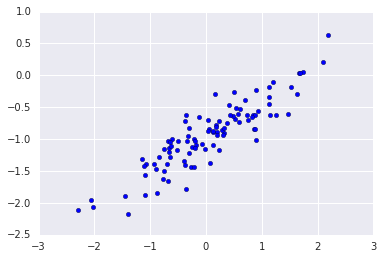

In [2]:
np.random.seed(1)
x = np.random.randn(100)
def create_simulated_data(variance_error_term) :
    eps = np.random.randn(100) * variance_error_term
    y = -1 + .5 * x + eps
    df = pd.DataFrame({'x' : x, 'y' : y})
    return (y, df)
y, df = create_simulated_data(.25)
plt.scatter(x, y);

### Linear model

In [3]:
fit = sm.ols("y ~ x", df).fit()
fit.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,-0.963247,0.023494,-40.998994,1.697125e-63,-1.009870,-0.916623
x,0.523857,0.026481,19.782585,5.387078e-36,0.471307,0.576407


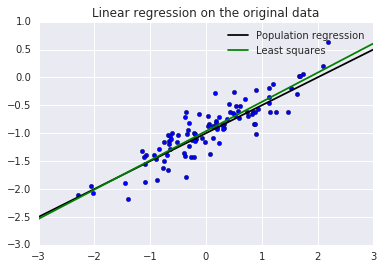

In [4]:
def plot_regression(title, fit, y) :
    plt.scatter(x, y);
    x_line = np.array([-3, 3])

    y_line_population = -1 + .5 * x_line
    plt.plot(x_line, y_line_population, 'black', label='Population regression')

    x_ols = np.linspace(-3,3,1000)
    y_ols = fit.predict(pd.DataFrame({'x' : x_ols}))
    plt.plot(x_ols, y_ols, 'g', label='Least squares')

    plt.axis([-3, 3, -3, 1])
    plt.title(title)
    plt.legend()
    plt.show();
    
plot_regression('Linear regression on the original data', fit, y)

### Polynomial regression model

In [5]:
fitPolynomial = sm.ols("y ~ x + np.power(x,2)", df).fit()
fitPolynomial.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,-0.966254,0.028856,-33.485548,4.214381e-55,-1.023525,-0.908983
x,0.523405,0.026729,19.582067,1.792548e-35,0.470356,0.576454
"np.power(x, 2)",0.003856,0.021265,0.181313,8.565000e-01,-0.038350,0.046061


The p-value for the quadratic term is 0.86, there is no evidence that it improves the model fit.

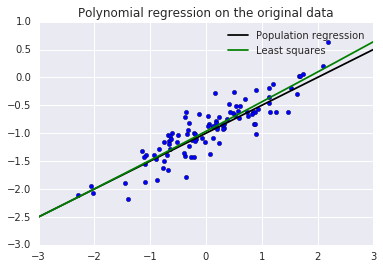

In [6]:
plot_regression('Polynomial regression on the original data', fitPolynomial, y)

##  Simulated data with *less* noise
Variance error term = 0.1

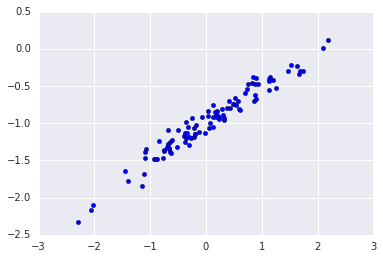

In [7]:
y_less, df_less = create_simulated_data(.1)
plt.scatter(x, y_less);

### Linear model

In [8]:
fit_less = sm.ols("y ~ x", df_less).fit()
fit_less.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,-0.998769,0.010168,-98.222016,1.061462e-99,-1.018948,-0.978590
x,0.495894,0.011461,43.268067,1.137489e-65,0.473150,0.518638


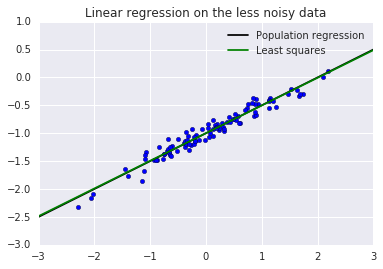

In [9]:
plot_regression('Linear regression on the less noisy data', fit_less, y_less)

### Polynomial regression model

In [10]:
fit_less_polynomial = sm.ols("y ~ x + np.power(x, 2)", df_less).fit()
fit_less_polynomial.summary2() #.tables[1]

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.953    
Dependent Variable: y                AIC:                -178.4179
Date:               2017-11-26 10:24 BIC:                -170.6024
No. Observations:   100              Log-Likelihood:     92.209   
Df Model:           2                F-statistic:        1013.    
Df Residuals:       97               Prob (F-statistic): 9.82e-66 
R-squared:          0.954            Scale:              0.0095463
------------------------------------------------------------------
                   Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
------------------------------------------------------------------
Intercept         -0.9785   0.0120 -81.7571 0.0000 -1.0023 -0.9548
x                  0.4989   0.0111  45.0038 0.0000  0.4769  0.5209
np.power(x, 2)    -0.0259   0.0088  -2.9412 0.0041 -0.0434 -0.0084
------------------------------------------------------------------
Omnibus:               0.959        Durbin-Watson:           2.254
Prob(Omnibus):         0.619        Jarque-Bera (JB):        1.053
Skew:                  0.213        Prob(JB):                0.591
Kurtosis:              2.733        Condition No.:           2    
==================================================================

"""

The p-value for the quadratic term is 0.0041, with the less noisy data there is evidence that it improves the model fit.

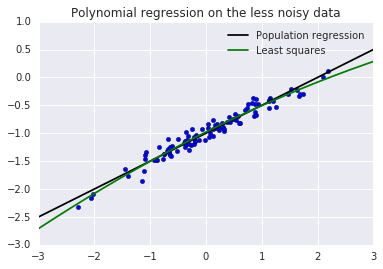

In [11]:
plot_regression('Polynomial regression on the less noisy data', fit_less_polynomial, y_less)

##  Simulated data with *more* noise
Variance error term = 1

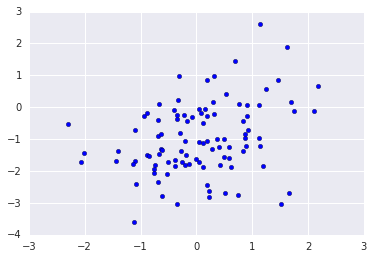

In [12]:
y_more, df_more = create_simulated_data(1)
plt.scatter(x, y_more);

### Linear model

In [13]:
fit_more = sm.ols("y ~ x", df_more).fit()
fit_more.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,-1.013962,0.107357,-9.444805,1.941474e-15,-1.227007,-0.800916
x,0.394347,0.121002,3.259004,1.537475e-03,0.154222,0.634472


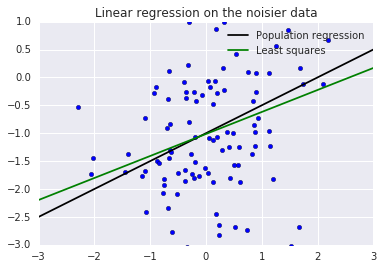

In [20]:
plot_regression('Linear regression on the noisier data', fit_more, y_more)

### Polynomial regression model

In [15]:
fit_more_polynomial = sm.ols("y ~ x + np.power(x, 2)", df_more).fit()
fit_more_polynomial.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,-1.086822,0.131248,-8.280649,6.773070e-13,-1.347314,-0.826331
x,0.383400,0.121574,3.153647,2.146637e-03,0.142110,0.624691
"np.power(x, 2)",0.093403,0.096723,0.965675,3.366082e-01,-0.098565,0.285370


The p-value for the quadratic term is 0.34, also with the noisier data there is no evidence that it improves the model fit.

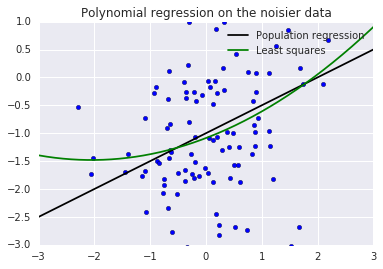

In [21]:
plot_regression('Polynomial regression on the noisier data', fit_more_polynomial, y_more)

The confidence intervals of ß₀ and ß₁become wider as the data becomes noisier :

In [17]:
fit_less.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,-0.998769,0.010168,-98.222016,1.061462e-99,-1.018948,-0.978590
x,0.495894,0.011461,43.268067,1.137489e-65,0.473150,0.518638


In [18]:
fit.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,-0.963247,0.023494,-40.998994,1.697125e-63,-1.009870,-0.916623
x,0.523857,0.026481,19.782585,5.387078e-36,0.471307,0.576407


In [19]:
fit_more.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,-1.013962,0.107357,-9.444805,1.941474e-15,-1.227007,-0.800916
x,0.394347,0.121002,3.259004,1.537475e-03,0.154222,0.634472
